# RLC Circuit

### We have connected an inductor, capacitor and resistor in a series circuit as shown below:

<img src="RLCcir.jpg">

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

*Differential equation for V<sub>C</sub>(t) from capacitor is:*

\begin{equation}
v_C^{'}(t) = \frac{i(t)}{C}
\end{equation}

*Kirchoff's voltage law gives,*

\begin{equation}
-V_B + v_L(t) + v_C(t) +v_R(t) = 0 
\end{equation}

\begin{equation}
v_L(t) = L * i^{'}(t) = V_B - v_C(t) - i(t) *R 
\end{equation}

*and we have differential equation for i<sub>L</sub>(t) as:*

\begin{equation}
i^{'}(t) = \frac{V_B - v_C(t) - i(t) * R}{L}
\end{equation}

## Solution using Numerical Method

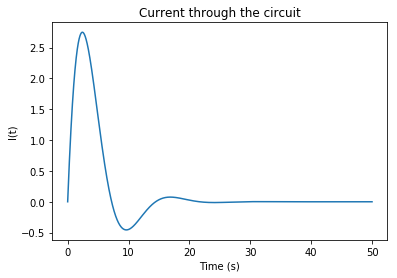

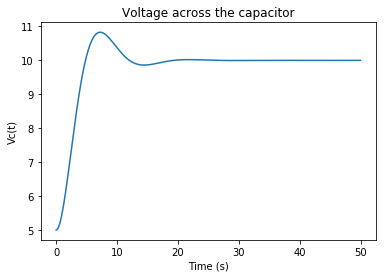

In [4]:
import numpy as np
import matplotlib.pyplot as plt

R = 1.0
L = 2.0
C = 2.0

t = np.arange(0,50,0.02)
Vs = 10

delta = 0.02

Vc = np.zeros(len(t))
I = np.zeros(len(t))
Vc[0] = 5
for i in range(1,len(Vc)):
    Vc[i] = Vc[i-1] + delta * I[i-1]/ C
    I[i] = I[i-1] - delta * (- Vs + Vc[i-1]+I[i-1] * R)/L

plt.plot(t,I)
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Current through the circuit')
plt.show()

plt.plot(t,Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

## Solution using FFT

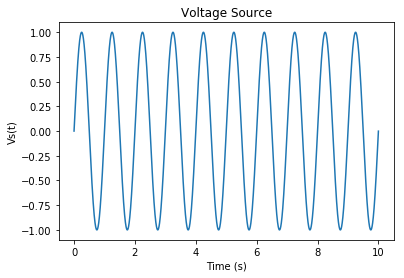

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


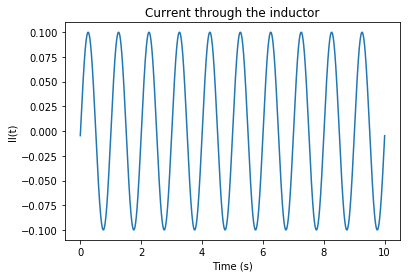

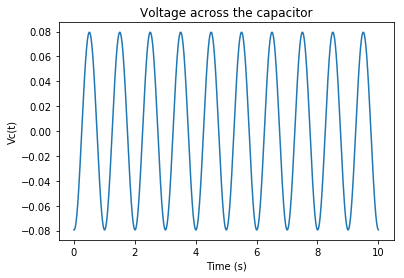

In [5]:
# With AC Source
from numpy.fft import fft
from numpy.fft import ifft

R = 10.0
L = 0.2
C = 0.2
T = 10
t = np.arange(0,T,0.0001)

Vs = np.sin(2*np.pi*1*t)

N = len(t)
w = np.ones(N)
w[0:N/2 +1]= 2 * np.pi/T * np.array([np.arange(0,N/2 +1)])
w[N/2+1 : N] = 2 * np.pi/T * np.arange(-(N/2 -1),0)

Il = ifft((1j *  w * fft(Vs))/ (L * -1 * w * w + 1j * w * R + 1/C)) 
Vc = ifft(fft(Il)/(C * 1j * w + 0.001))

plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()


plt.plot(t,(Il))
plt.xlabel('Time (s)')
plt.ylabel('Il(t)')
plt.title('Current through the inductor')
plt.show()

plt.plot(t,(Vc))
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()